In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
holidays_events = pd.read_csv('Data/holidays_events.csv')
oil = pd.read_csv('Data/oil.csv')
stores = pd.read_csv('Data/stores.csv')
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')
transactions = pd.read_csv('Data/transactions.csv')

In [24]:
holidays_events["date"] = pd.to_datetime(holidays_events.date)
oil["date"] = pd.to_datetime(oil.date)
test["date"] = pd.to_datetime(test.date)
train["date"] = pd.to_datetime(train.date)
transactions["date"] = pd.to_datetime(transactions.date)

In [25]:
holidays_events.head(3)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


In [26]:
oil['dcoilwtico'].fillna(np.nanmedian(oil.dcoilwtico), inplace = True)
oil.head(3)

,date,dcoilwtico
0,2013-01-01,53.190
1,2013-01-02,93.140
2,2013-01-03,92.970


In [27]:
stores.head(3)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


In [28]:
train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0


In [29]:
test.head(3)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


In [30]:
transactions.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

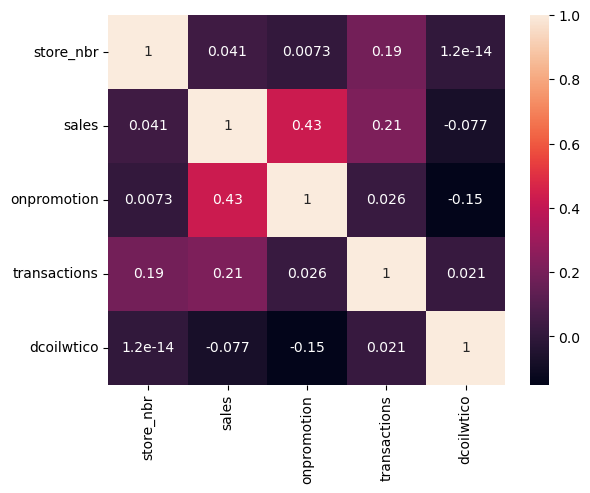

In [31]:
temp = pd.merge(temp, oil, how='left')
sns.heatmap(temp.corr(), annot=True)
plt.plot

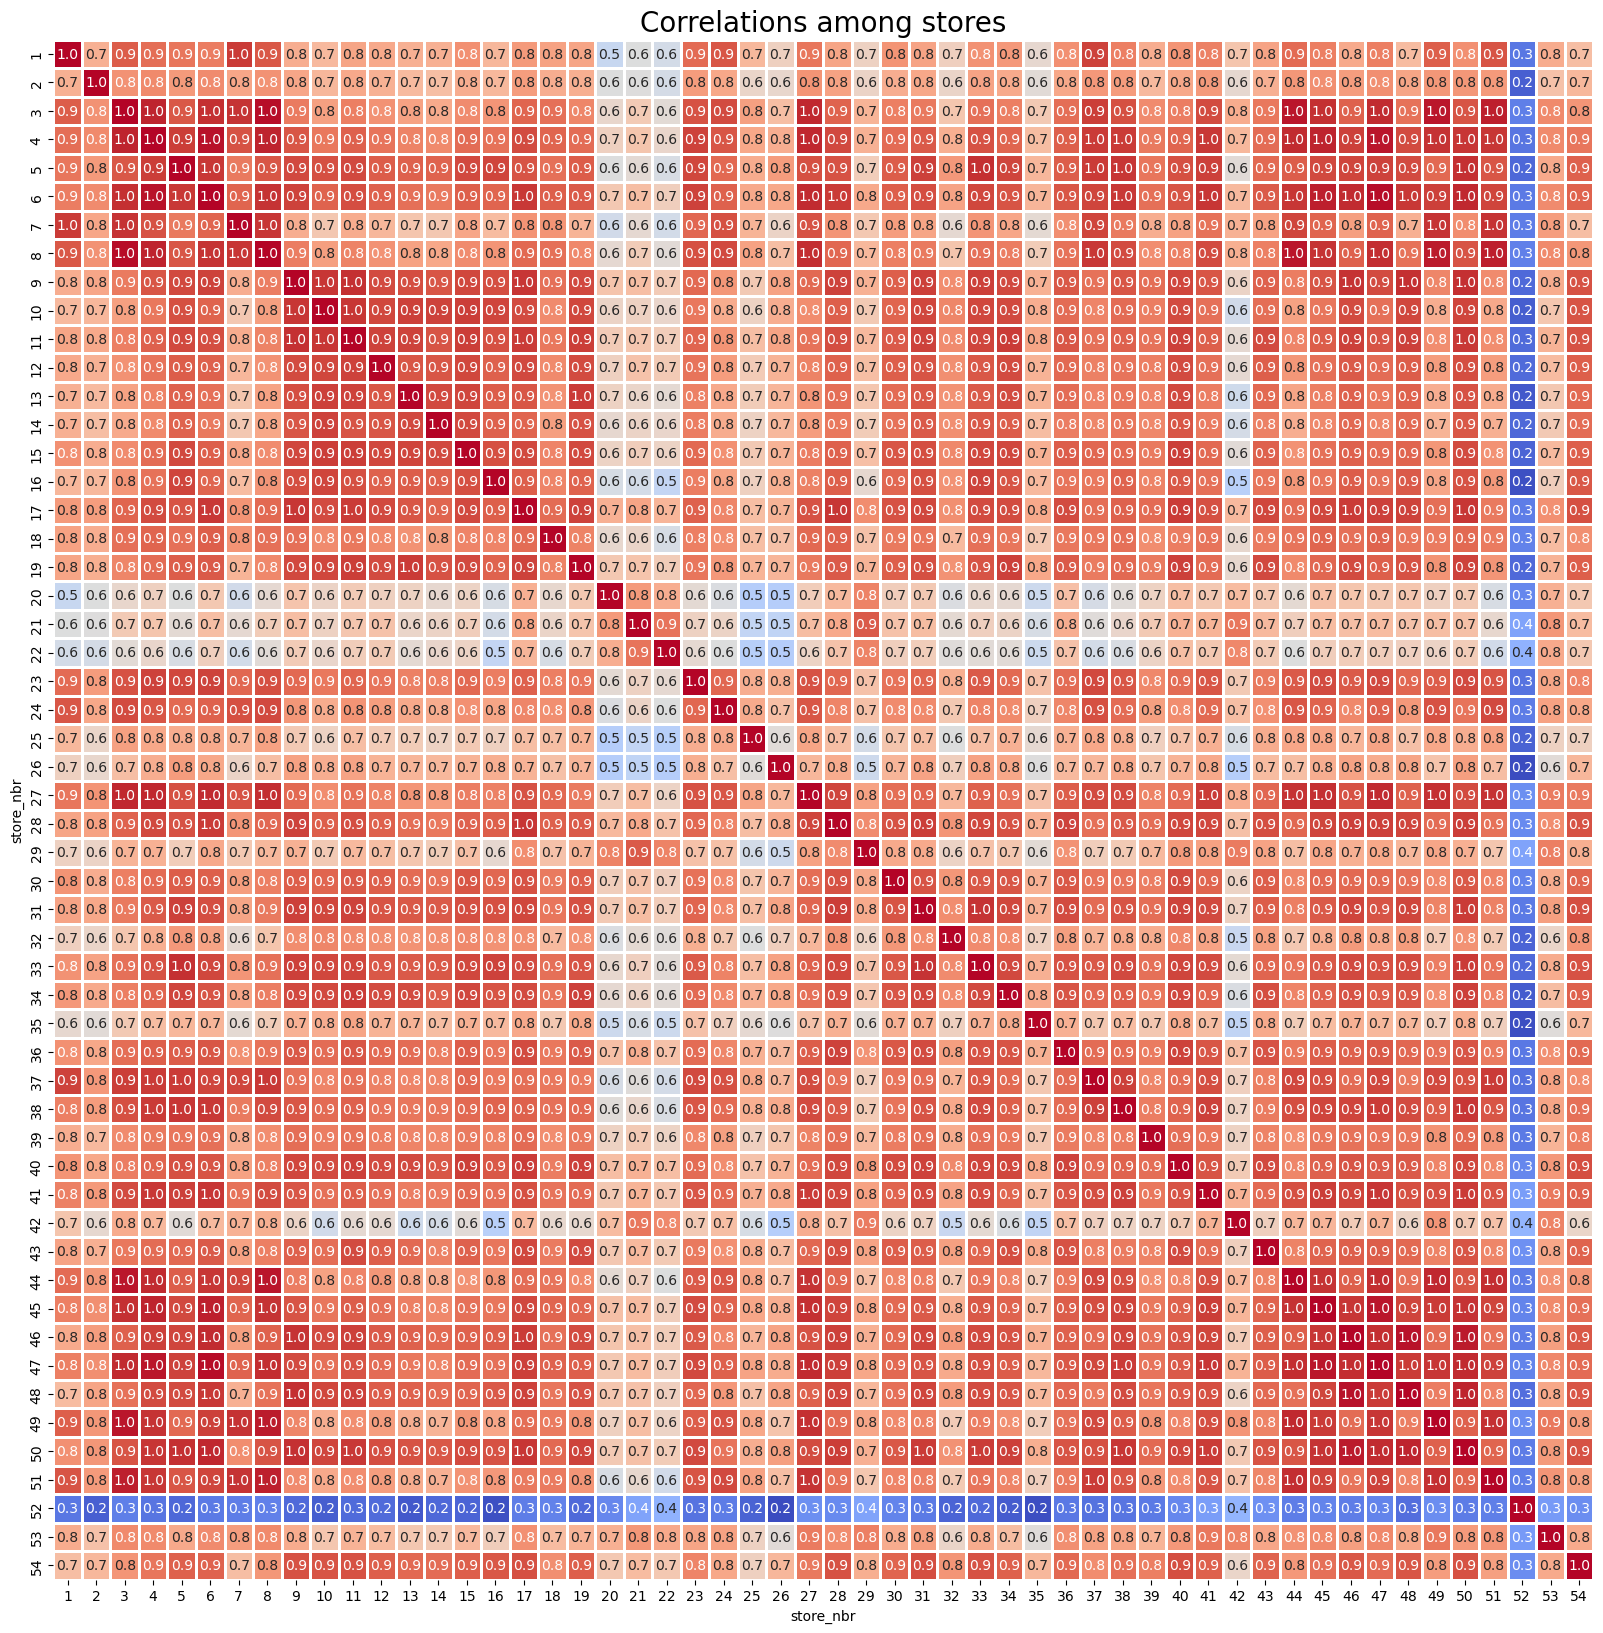

In [32]:
a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
# mask = np.triu(a.corr())
# mask
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

In [33]:
train.shape

(3000888, 6)

In [34]:
train = train[~((train.store_nbr == 52) & (train.date < "2017-04-20"))]
train = train[~((train.store_nbr == 22) & (train.date < "2015-10-09"))]
train = train[~((train.store_nbr == 42) & (train.date < "2015-08-21"))]
train = train[~((train.store_nbr == 21) & (train.date < "2015-07-24"))]
train = train[~((train.store_nbr == 29) & (train.date < "2015-03-20"))]
train = train[~((train.store_nbr == 20) & (train.date < "2015-02-13"))]
train = train[~((train.store_nbr == 53) & (train.date < "2014-05-29"))]
train = train[~((train.store_nbr == 36) & (train.date < "2013-05-09"))]
train.shape

(2780316, 6)

In [35]:
c = train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family","store_nbr"])
c = c[c.sales == 0]
c

,store_nbr,family,sales
1,1,BABY CARE,0.000
397,13,BABY CARE,0.000
727,23,BABY CARE,0.000
1420,44,BABY CARE,0.000
1453,45,BABY CARE,0.000
1486,46,BABY CARE,0.000
1519,47,BABY CARE,0.000
1552,48,BABY CARE,0.000
1585,49,BABY CARE,0.000
1618,50,BABY CARE,0.000


In [36]:
outer_join = train.merge(c[c.sales == 0].drop("sales",axis = 1), how = 'outer', indicator = True)
train = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
del outer_join
train.shape

(2698648, 6)

In [37]:
c
zero_prediction = []
for i in range(0,len(c)):
    zero_prediction.append(
        pd.DataFrame({
            "date":pd.date_range("2017-08-16", "2017-08-31").tolist(),
            "store_nbr":c.store_nbr.iloc[i],
            "family":c.family.iloc[i],
            "sales":0
        })
    )
zero_prediction = pd.concat(zero_prediction)
del c
zero_prediction

,date,store_nbr,family,sales
0,2017-08-16,1,BABY CARE,0
1,2017-08-17,1,BABY CARE,0
2,2017-08-18,1,BABY CARE,0
3,2017-08-19,1,BABY CARE,0
4,2017-08-20,1,BABY CARE,0
...,...,...,...,...
11,2017-08-27,54,LAWN AND GARDEN,0
12,2017-08-28,54,LAWN AND GARDEN,0
13,2017-08-29,54,LAWN AND GARDEN,0
14,2017-08-30,54,LAWN AND GARDEN,0


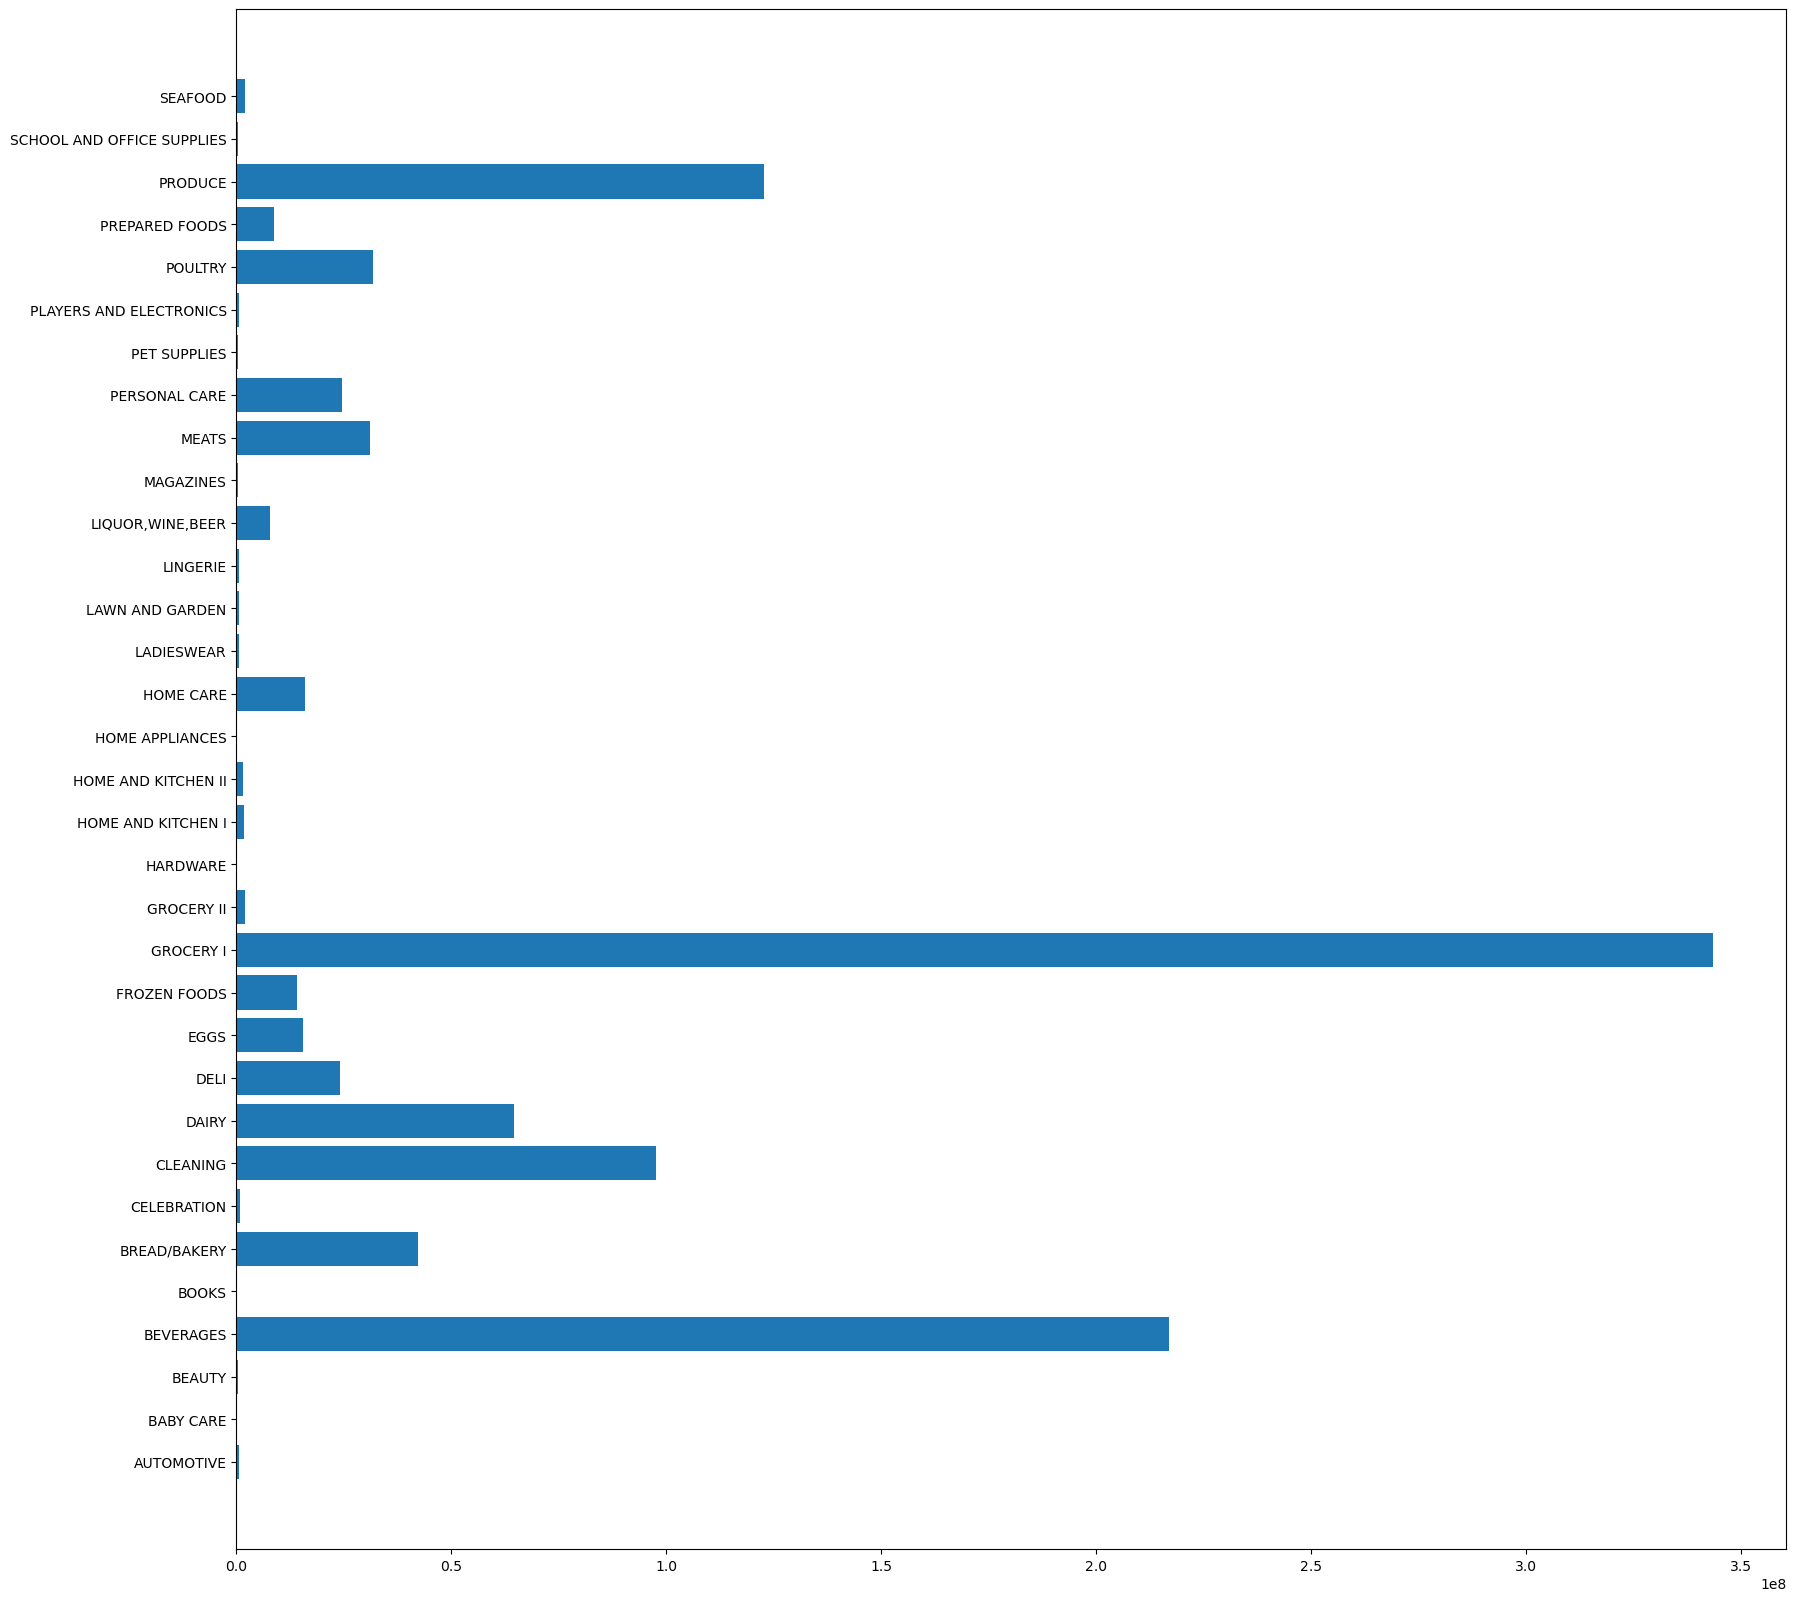

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.figure(figsize=(20, 20))
train_family = train.set_index("date").groupby("family").resample("D").sales.sum().reset_index()
grp_by = train_family.groupby('family')['sales'].sum().reset_index()
plt.barh(grp_by['family'],grp_by['sales'])
plt.show()

In [ ]:
train_sa = pd.merge(train, stores)
d["store_nbr"] = d["store_nbr"].astype("int8")
d["year"] = d.date.dt.yearl